In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/Marvel_dataset.zip

Archive:  /content/drive/MyDrive/Marvel_dataset.zip
   creating: Marvel_dataset/
   creating: Marvel_dataset/Marvel_dataset/
   creating: Marvel_dataset/Marvel_dataset/Test/
   creating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669715.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669716.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669717.jpg  
 extracting: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669718.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669720.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669721.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669724.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669726.jpg  
  inflating: Marvel_dataset/Marvel_dataset/Test/black_panther_test/3669727.jpg  
  inflating: Marvel_dataset/M

In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [7]:
testdir = '/content/Marvel_dataset/Marvel_dataset/Test'
for fn in os.listdir(testdir):
  os.rename(os.path.join(testdir, fn),
            os.path.join(testdir,fn.rsplit('_', 1)[0]))

In [8]:
traindir = '/content/Marvel_dataset/Marvel_dataset/Train'
for fn in os.listdir(traindir):
  os.rename(os.path.join(traindir, fn),
            os.path.join(traindir,fn.rsplit('_', 1)[0]))

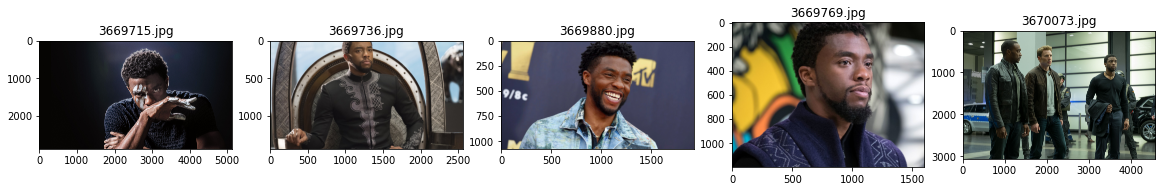

In [9]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))
test_folder=r'/content/Marvel_dataset/Marvel_dataset/Test/black_panther'
for i in range(5):
    file = np.random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
# IMG_WIDTH=200
# IMG_HEIGHT=200
# img_folder=r'/content/Marvel_dataset/Train'

In [ ]:
# def create_dataset(img_folder):
   
#     img_data_array=[]
#     class_name=[]
#     for dir1 in os.listdir(img_folder):
#         for file in os.listdir(os.path.join(img_folder, dir1)):
#             image_path= os.path.join(img_folder, dir1,  file)
#             image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
#             try:
#               image=cv2.resize(image,(IMG_WIDTH,IMG_HEIGHT),interpolation = cv2.INTER_AREA)
#               image=np.array(image)
#               image = image.astype('float32')
#               image /= 255
#               print(image.shape)
#               img_data_array.append(image)
#               class_name.append(dir1)
#             except:
#               break
#     return np.array(img_data_array), class_name
# # extract the image array and class name
# img_data, class_name =create_dataset(r'/content/Marvel_dataset/Train')

In [ ]:
# test_img_data,test_class_name= create_dataset(r'/content/Marvel_dataset/Test')

In [ ]:
# target_dict={k: v for v, k in enumerate(np.unique(class_name))}
# target_dict

In [10]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import tensorflow as tf
IMG_WIDTH=150
IMG_HEIGHT=150
batch_size = 130
epochs = 20
train_dir = r'/content/Marvel_dataset/Marvel_dataset/Train'
test_dir  = r'/content/Marvel_dataset/Marvel_dataset/Train'
#val_dir   = r'\CV\Intel_Images\seg_test\seg_test'
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     zoom_range=0.2, 
                                     rotation_range=65,
                                     shear_range=0.09,
                                     horizontal_flip=True,
                                     vertical_flip=True)
image_gen_test = ImageDataGenerator(rescale=1./255)

In [11]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='sparse')

Found 1568 images belonging to 7 classes.
Found 1568 images belonging to 7 classes.


In [12]:
train_data_gen.class_indices.keys()

dict_keys(['black_panther', 'black_widow', 'cap_america', 'spiderman', 'thor', 'tony_stark', 'wolverine'])

In [15]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))# Adding dropout to turn down some neurons
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

In [16]:
# model=tf.keras.Sequential(
#         [
#             tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
#             tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
#             tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(6)
#          ])
#Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [18]:
#Fitting the model
history = model.fit(train_data_gen,
                    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), 
                    validation_data=test_data_gen, 
                    epochs=epochs,
                    validation_steps=int(np.ceil(test_data_gen.n / float(batch_size)))
                    )

Epoch 1/20
13/13 [==============================] - 44s 3s/step - loss: 2.0516 - accuracy: 0.1630 - val_loss: 1.8677 - val_accuracy: 0.3074
Epoch 2/20
13/13 [==============================] - 39s 3s/step - loss: 1.8269 - accuracy: 0.2989 - val_loss: 1.6573 - val_accuracy: 0.3463
Epoch 3/20
13/13 [==============================] - 38s 3s/step - loss: 1.6586 - accuracy: 0.3350 - val_loss: 1.7015 - val_accuracy: 0.3438
Epoch 4/20
13/13 [==============================] - 38s 3s/step - loss: 1.5818 - accuracy: 0.3758 - val_loss: 1.5265 - val_accuracy: 0.4082
Epoch 5/20
13/13 [==============================] - 38s 3s/step - loss: 1.5402 - accuracy: 0.4181 - val_loss: 1.5696 - val_accuracy: 0.3833
Epoch 6/20
13/13 [==============================] - 38s 3s/step - loss: 1.5274 - accuracy: 0.3905 - val_loss: 1.5944 - val_accuracy: 0.3380
Epoch 7/20
13/13 [==============================] - 38s 3s/step - loss: 1.5205 - accuracy: 0.4008 - val_loss: 1.4742 - val_accuracy: 0.4375
Epoch 8/20
13/13 [==